In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

df = pd.read_csv('../../../Cleaned Datasets/emissions_cleaned.csv')

X = df.drop(columns=["Comb CO2"])
y = df["Comb CO2"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Sk-learn implementation

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model = RandomForestRegressor(n_estimators = 40, max_features = 'sqrt', max_depth = 20, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse**.5
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Absolute Error: 4.520977946300551
Mean Squared Error: 45.574133297404664
Root Mean Squared Error: 6.750861670735423
R-squared score: 0.9897233906763112


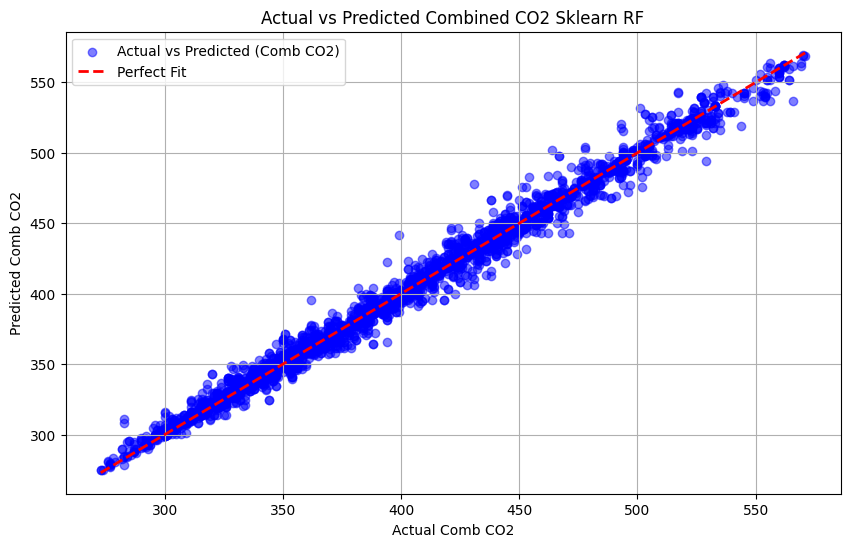

In [3]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted (Comb CO2)', alpha=0.5)
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--', lw=2,
         label='Perfect Fit')
plt.xlabel('Actual Comb CO2')
plt.ylabel('Predicted Comb CO2')
plt.title('Actual vs Predicted Combined CO2 Sklearn RF')
plt.legend()
plt.grid(True)
plt.show()